## View Flux SkyMap

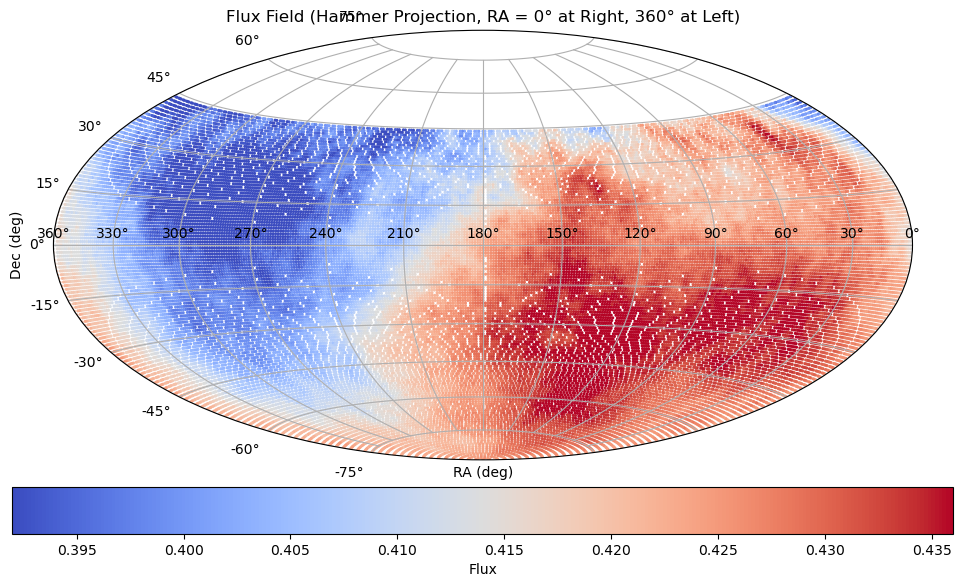

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Load flux data
file_path = "../data/Auger/flux_a8_lb.dat"
data = np.loadtxt(file_path)

# Columns: Dec, RA, Flux, Flux_unc, Gal_l, Gal_b
dec = data[:, 0]
ra = data[:, 1]
flux = data[:, 2]

# Convert to radians
ra_rad = np.radians(ra)
dec_rad = np.radians(dec)

# Shift RA to put RA=0° on right edge, increase leftward
ra_shifted = np.remainder(ra_rad + np.pi, 2 * np.pi)
ra_shifted[ra_shifted > np.pi] -= 2 * np.pi
ra_shifted = -ra_shifted  # flip to increase leftward

# Create plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='hammer')

# Normalize flux
norm = colors.Normalize(vmin=np.percentile(flux, 5), vmax=np.percentile(flux, 95))

# Scatter plot
sc = ax.scatter(ra_shifted, dec_rad, c=flux, s=5, cmap='coolwarm', norm=norm, edgecolor='none')

# RA tick positions: in radians from +π to -π (visible range)
tick_labels_deg = np.arange(0, 361, 30)  # [0, 30, ..., 360]
tick_positions_rad = np.radians(np.linspace(180, -180, len(tick_labels_deg)))  # [π, ..., −π]

# Assign the positions and labels
ax.set_xticks(tick_positions_rad)
ax.set_xticklabels([f"{deg}°" for deg in tick_labels_deg])

# Labels, grid, colorbar
ax.set_xlabel("RA (deg)")
ax.set_ylabel("Dec (deg)")
ax.grid(True)

cbar = plt.colorbar(sc, orientation='horizontal', pad=0.05)
cbar.set_label("Flux")

plt.title("Flux Field (Hammer Projection, RA = 0° at Right, 360° at Left)")
plt.tight_layout()
plt.show()


-25.956402723178492 -23.00028790026893


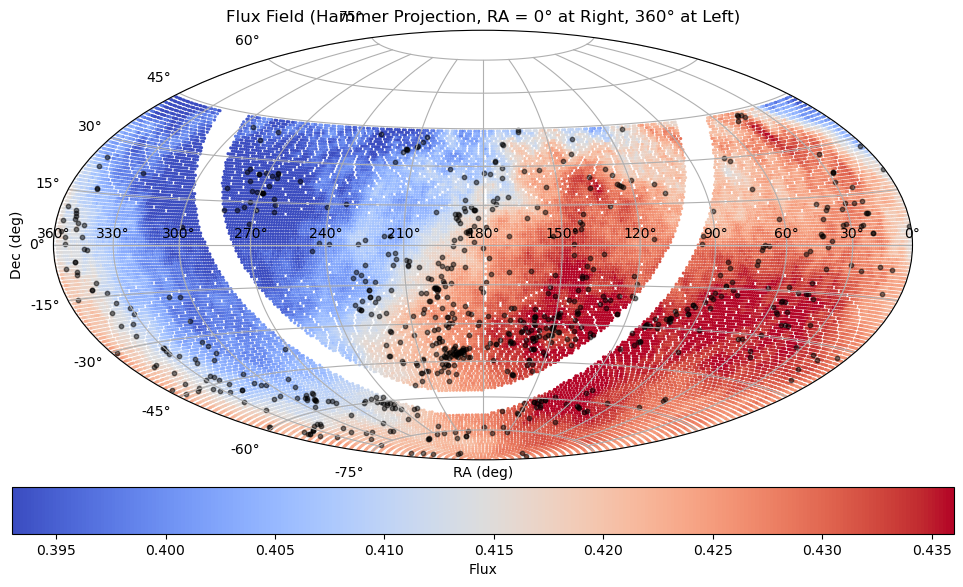

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from astropy.io import ascii

def get_milkyway_mask(ra, dec):
    import numpy as np
    from astropy.coordinates import SkyCoord
    import astropy.units as u

    """Apply a mask to eliminate points within 5° in galactic latitude."""
    ran = SkyCoord(ra, dec, frame='icrs',unit='degree')
    mask = np.where([abs(ran.galactic.b)>5.*(u.degree)])[1]
    return mask

#gxs = ascii.read('../data/2MRSxWISE_sinBPTAGNs.txt')
gxs = ascii.read('../data/VLS_ang5_cz_700control_def.txt')
gxs = gxs[(gxs['cz'] > 1200)&(gxs['cz']<3600)]  
gxs=gxs[gxs['_DEJ2000']<45.]
gxs = gxs[gxs['K_abs']<-23.]
print(gxs['K_abs'].min(), gxs['K_abs'].max())

# Load flux data
file_path = "../data/Auger/flux_a8_lb.dat"
data = np.loadtxt(file_path)

# Columns: Dec, RA, Flux, Flux_unc, Gal_l, Gal_b
dec = data[:, 0]
ra = data[:, 1]
flux = data[:, 2]

get_mw_mask = get_milkyway_mask(ra, dec)
ra = ra[get_mw_mask]
dec = dec[get_mw_mask]
flux = flux[get_mw_mask]

# Convert to radians
ra_rad = np.radians(ra)
dec_rad = np.radians(dec)
ra_gxs = np.radians(gxs['_RAJ2000'])

# Shift RA to put RA=0° on right edge, increase leftward
ra_shifted = np.remainder(ra_rad + np.pi, 2 * np.pi)
ra_gxs_shifted = np.remainder(ra_gxs + np.pi, 2 * np.pi)
ra_shifted[ra_shifted > np.pi] -= 2 * np.pi
ra_gxs_shifted[ra_gxs_shifted > np.pi] -= 2 * np.pi
ra_shifted = -ra_shifted  # flip to increase leftward
ra_gxs_shifted = -ra_gxs_shifted  # flip to increase leftward

# Create plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='hammer')

# Normalize flux
norm = colors.Normalize(vmin=np.percentile(flux, 5), vmax=np.percentile(flux, 95))

# Scatter plot
sc = ax.scatter(ra_shifted, dec_rad, c=flux, s=5, cmap='coolwarm', norm=norm, edgecolor='none')

# RA tick positions: in radians from +π to -π (visible range)
tick_labels_deg = np.arange(0, 361, 30)  # [0, 30, ..., 360]
tick_positions_rad = np.radians(np.linspace(180, -180, len(tick_labels_deg)))  # [π, ..., −π]

# Assign the positions and labels
ax.set_xticks(tick_positions_rad)
ax.set_xticklabels([f"{deg}°" for deg in tick_labels_deg])

# Labels, grid, colorbar
ax.set_xlabel("RA (deg)")
ax.set_ylabel("Dec (deg)")
ax.grid(True)

cbar = plt.colorbar(sc, orientation='horizontal', pad=0.05)
cbar.set_label("Flux")

plt.scatter(ra_gxs_shifted, np.radians(gxs['_DEJ2000']), s=10, color='black', alpha=0.5, label='Galaxies')

plt.title("Flux Field (Hammer Projection, RA = 0° at Right, 360° at Left)")
plt.tight_layout()
plt.show()
